## Librerias

Las librerías implementadas permiten:

-pandas: La manipulación y el análisis de datos \
-matplotlib: Permite crear y personalizar los tipos de gráficos más comunes \
-seaborn: Visualización de datos para Python desarrollada sobre matplotlib . Ofrece una interfaz de alto nivel para la creación de atractivas gráficas. \
-sklearn: Para algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Cargando datos

Lo primero que hacemos es traer los datos de las características para esto se utilizó pd.read_excel() el cual permite realizar la lectura del Excel el cual previamente creamos en clasification.ipynb, 

In [2]:
df = pd.read_excel('data/datosObtenidos.xlsx')
df.head()

,Unnamed: 0,Figure_label,Figure,Borders_prom,Areas_prom,Angle_Harris
0,0,1,Circle,91.906217,168.000000,0.000507
1,1,1,Circle,110.545370,48.333333,0.000918
2,2,1,Circle,115.060232,116.892857,0.001150
3,3,1,Circle,92.267347,217.785714,0.000308
4,4,1,Circle,114.170918,15.785714,0.000905


A continuación, se imprime la cantidad de muestras que se tomaron (columnas, filas), las categorías que se manejan en la base de datos y el número de figuras/muestras que se tomaron para cada caso

In [3]:
print('------')
print('Samples')
print(df.shape)
print('------')
print('Categories')
print(df['Figure'].unique())
print('------')
print('Number of examples per class')
print(df.groupby('Figure').size())
print('------')

------
Samples
(59, 6)
------
Categories
['Circle' 'Secchi3000' 'Squares']
------
Number of examples per class
Figure
Circle        19
Secchi3000    20
Squares       20
dtype: int64
------


Con sns.countplot() se toman los datos de la columna de "figure" y se realiza una grafica en donde se evidencian los datos recaudados en cada categoría

C:\Users\asjim\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


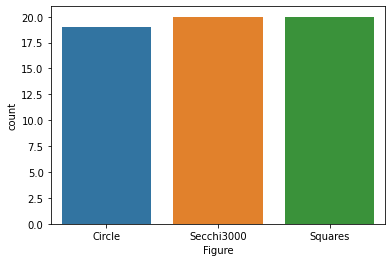

In [4]:
sns.countplot(df['Figure'],label="Count")
plt.show()

# Visualización

Ahora se hace la muestra de un diagrama de caja de cada característica, del cual se puede observar los mínimos, máximos y mediana del conjunto de datos y en donde se centran más estos, ya sea cerca al mínimo como el promedio de las áreas de los contornos, cerca al máximo como los ángulos de Harris o más centrado como lo es en el caso del promedio de los bordes

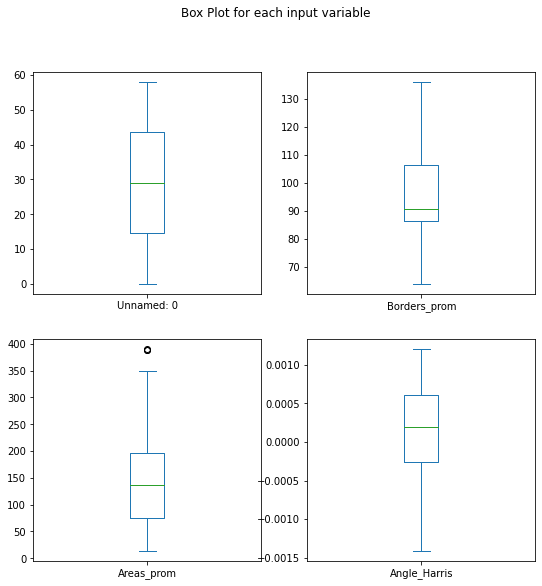

In [5]:
df.drop('Figure_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('data/Figures_box')
plt.show()

# Extracción de características y correlaciones

En esta sección se hace la asignación de x,y en donde "X" corresponde a las características de cada imagen y "Y" al número correspondiente de cada figura (circulo=1, secchi3000=2, cuadrado=3), de igual forma se muestra la gráfica de dispersión en donde se puede observar la distribución de los datos y así poder encontrar patrones y relaciones entre los datos

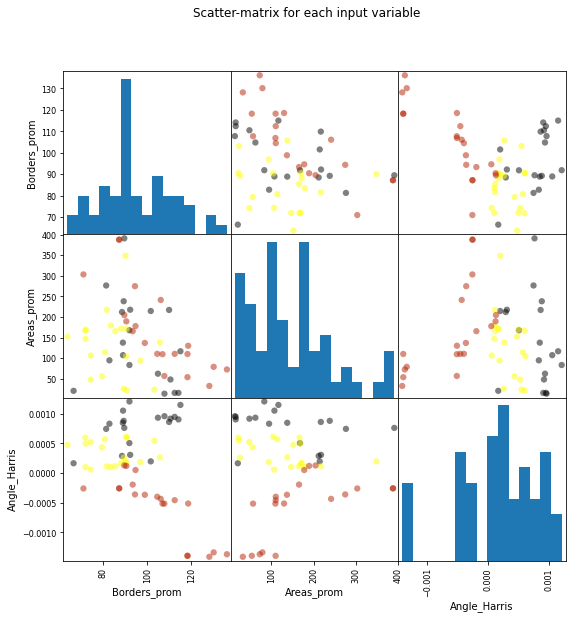

In [6]:
feature_names = ['Borders_prom','Areas_prom','Angle_Harris']
X = df[feature_names]
y = df['Figure_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('data/figures_scatter_matrix')

# Statistical description

Con la funcion .describe() se muestran ciertos valores estadísticos de la base de datos como cantidad de datos, media, mínimos entre otros datos más que permiten sintetizar, comparar e interpretar de forma sencilla el conjunto de características 

In [7]:
df.describe()

,Unnamed: 0,Figure_label,Borders_prom,Areas_prom,Angle_Harris
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,29.000000,2.016949,95.052728,146.019233,0.000169
std,17.175564,0.819830,16.102730,96.168474,0.000664
min,0.000000,1.000000,63.811806,13.875000,-0.001411
25%,14.500000,1.000000,86.408854,75.899621,-0.000257
50%,29.000000,2.000000,90.679398,137.071429,0.000198
75%,43.500000,3.000000,106.536458,197.181250,0.000605
max,58.000000,3.000000,136.150000,391.100000,0.001209


# Cálculo de conjuntos de datos de entrenamiento, validación y prueba

Para esto se calcularon dos subconjuntos de los datos, unos de entrenamiento y otros de prueba(test, train), ahora se toman estos datos y se parten en dos conjuntos adicionales (X_train, X_test, y_train, y_test), de igual forma se realiza el mismo procedimiento con validación para así poder verificar que tan acertado es el algoritmo, luego de esto se imprimen los datos calculados como se muestra a continuación

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)
print(f"Datos de entrenamiento: {X_train.shape[0]}")
print(f"Datos de validación: {X_val.shape[0]}")
print(f"Datos de test: {X_test.shape[0]}")

Datos de entrenamiento: 33
Datos de validación: 11
Datos de test: 15


# Funciones de escala

A continuación se hace un escalamiento de los datos o "normalización" de cada característica de modo que este en el rango de 0 a 1 para así obtener un mejor tratamiento de datos los cuales se aplicaran en los modelos de validación, es importante tener en cuenta que para los datos de entrenamiento se utiliza el fit_transform(), esto  para que podamos escalar los datos de entrenamiento y también aprender los parámetros de escala de esos datos. y para los datos de prueba únicamente el transform() esto con el fin de que el modelo únicamente aprenda de los parámetros en la sección de entrenamiento y no en la de validación y prueba

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


# Comparación de modelos en validación

Ya después de tener estos datos se continúa con la aplicación de los modelos de validación en donde se verificará la precisión del clasificador

## Logistic regression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on validation set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on validation set: 0.45


## KNN

In [11]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
print('Accuracy of K-NN-1 classifier on training set: {:.2f}'.format(knn1.score(X_train, y_train)))
print('Accuracy of K-NN-1 classifier on validation set: {:.2f}'.format(knn1.score(X_val, y_val)))

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
print('Accuracy of K-NN-2 classifier on training set: {:.2f}'.format(knn2.score(X_train, y_train)))
print('Accuracy of K-NN-2 classifier on validation set: {:.2f}'.format(knn2.score(X_val, y_val)))

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
print('Accuracy of K-NN-3 classifier on training set: {:.2f}'.format(knn3.score(X_train, y_train)))
print('Accuracy of K-NN-3 classifier on validation set: {:.2f}'.format(knn3.score(X_val, y_val)))

Accuracy of K-NN-1 classifier on training set: 1.00
Accuracy of K-NN-1 classifier on validation set: 0.64
Accuracy of K-NN-2 classifier on training set: 0.82
Accuracy of K-NN-2 classifier on validation set: 0.64
Accuracy of K-NN-3 classifier on training set: 0.88
Accuracy of K-NN-3 classifier on validation set: 0.64


## Linear discrimination analysis

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on validation set: {:.2f}'.format(lda.score(X_val, y_val)))

Accuracy of LDA classifier on training set: 0.94
Accuracy of LDA classifier on validation set: 0.55


## Gaussian Naive Bayes

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on validation set: {:.2f}'.format(gnb.score(X_val, y_val)))

Accuracy of GNB classifier on training set: 0.88
Accuracy of GNB classifier on validation set: 0.45


## Support Vector Machine

In [14]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on validation set: {:.2f}'.format(svm.score(X_val, y_val)))

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on validation set: 0.55


# Test

Luego de aplicar cada modelo se continua a verificar cual obtuvo un mejor resultado, en este caso el modelo que obtuvo el mejor resultado de validación fue el de KNN con un 64% por lo tanto para rectificar la precisión del clasificador de regresión logística en el conjunto de prueba se debe traer el score del KNN en este caso el primero (knn1)

In [15]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn1.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.93


## Detalles sobre el conjunto de prueba

A continuación se muestra una matriz en donde se muestran las precisiones que se obtuvieron con respecto a los diferentes tipos de figuras (1=círculos, 2= cuadrado, 3= secchi3000) de allí se puede observar que se obtuvo buenos resultados para los círculos y secchi3000 con una precisión del 100%

In [16]:
pred = knn1.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3 1 0]
 [0 4 0]
 [0 0 7]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7

    accuracy                           0.93        15
   macro avg       0.93      0.92      0.92        15
weighted avg       0.95      0.93      0.93        15



# Conclusiones

En primer lugar, se logra obtener resultados satisfactorios con el desarrollo para abordar el problema de la clasificación multiclase, logrando llegar a resultados de precisión del 100%, a partir de un conjunto de datos, en donde más características y muestras se tengan, más preciso será este en sus predicciones, dado que permite un mejor aprendizaje en los diferentes modelos. Para llegar a esto primero se pensó en únicamente la característica de contornos que contenía cada imagen, sin embargo al observar los resultados los porcentajes no subían de 63% en los modelos como en la matriz de confusión, por lo que para mejorar se tomó la decisión de realizar una búsqueda sobre datos relevante que se puedan extraer de una imagen, en donde se logrará una mejor distinción entre los grupos de imágenes, con esto se implementaron otras dos características que permitieron una mejor precisión en el algoritmo, que fueron área por contorno y ángulo de Harris, lo cual efectivamente mejoro los resultados logrando obtener resultado del 100% o cercanos.

Con respecto a los resultados, se puede afirmar que el procesamiento de la base de datos de imágenes su dispersión no es muy grande entre los diferentes grupos por lo que permite un mejor resultado, como se muestra en la gráfica "figures_scatter_matrix.png", en donde se observa cada una de las características obtenidas y su comportamiento, de igual forma, se concluye que la nitidez, resolución y contraste de las imágenes entran de igual forma como aspecto importante dado que al implementar archivos en donde las figuras se ven nubladas su precisión tiende a bajar dado la dificultad en lograr identificar los contornos, áreas y ángulos.

Finalmente, se observó también que cada modelo varia su resultado dependiendo del problema, en este caso el modelo que mejor resultado tuvo fue el KNN, sin embargo existen ocasiones que al implementar o reducir la cantidad de características el modelo más eficiente cambia por lo tanto es importante verificar siempre los datos para obtener mejores predicciones, por lo que como factores claves para lograr esto es tener en cuenta la medida de desempeño que se quiera tener en cuenta y la normalización de los datos, debido a que esto permite facilitar el aprendizaje a los diferentes modelos, buscando la forma más optima y eficaz. 


## Referencias

1. A. (2020b, junio 14). Detectando FIGURAS GEOMÉTRICAS (🔵🔺⬛) con OpenCV - Python » omes-va.com. OMES. https://omes-va.com/detectando-figuras-geometricas-con-opencv-python/
2. A. (2020a, junio 14). 👩 Reconocimiento Facial 👨 | Python - OpenCV » omes-va.com. OMES. https://omes-va.com/reconocimiento-facial-python-opencv/
3. N. (2020c, junio 25). Clasificación de Imágenes en Python. Aprende Machine Learning. https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/
4. M. (2021, 5 octubre). Detección de bordes Canny - openCV python. kipunaEc. https://noemioocc.github.io/posts/Detecci%C3%B3n-de-bordes-Canny-openCV-python/
5. Hernández, L. D. V. (2021, 1 diciembre). Detector de bordes Canny, cómo contar objetos con OpenCV y Python. Programar fácil con Arduino. https://programarfacil.com/blog/vision-artificial/detector-de-bordes-canny-opencv/
6. OpenCV: OpenCV modules. (s. f.). Opencv. https://docs.opencv.org/4.x/
7. MinMaxScaler | Interactive Chaos. (s. f.). Interactivechaos. https://interactivechaos.com/es/manual/tutorial-de-machine-learning/minmaxscaler
8. Calcular las características del contorno en OpenCV - programador clic. (s. f.). Programador clic. https://programmerclick.com/article/21701852880/
9. Detección de ángulos de Harris de OpenCV-Python - programador clic. (s. f.). Programador clic. https://programmerclick.com/article/13532152546/